In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
sm=pd.read_csv("smoking.csv")

In [24]:


# حجم العينة المطلوبة
sample_size = 5000  # يمكنك تعديل هذا الرقم حسب الحاجة

# اختيار العينة عشوائياً
sm = sm.sample(n=sample_size, random_state=42)  # يمكنك تغيير القيمة random_state إذا كنت ترغب في الحصول على نفس العينة كل مرة
sm

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
676014,Female,45,160,60,85.0,1.2,1.0,1.0,1.0,113.0,...,100.0,64.0,13.3,1.0,0.8,16.0,13.0,14.0,1.0,N
958905,Male,30,175,70,87.0,0.9,0.9,1.0,1.0,135.0,...,147.0,127.0,15.9,2.0,1.2,24.0,28.0,16.0,1.0,N
472540,Male,35,180,85,93.0,1.2,1.5,1.0,1.0,129.0,...,119.0,204.0,16.6,1.0,1.0,34.0,61.0,25.0,2.0,N
244194,Male,35,175,80,89.0,1.5,1.5,1.0,1.0,119.0,...,130.0,50.0,15.2,1.0,0.9,18.0,17.0,17.0,1.0,Y
88447,Female,40,160,70,97.0,1.5,1.0,1.0,1.0,124.0,...,91.0,81.0,12.8,1.0,0.5,15.0,17.0,14.0,1.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75485,Female,60,155,60,88.8,1.0,1.0,1.0,1.0,130.0,...,100.0,189.0,14.1,1.0,0.6,16.0,9.0,17.0,3.0,N
829116,Male,30,175,80,90.3,1.0,1.0,1.0,2.0,113.0,...,120.0,96.0,15.4,1.0,0.8,31.0,40.0,35.0,1.0,Y
358226,Female,50,150,75,91.5,0.7,0.6,1.0,1.0,140.0,...,112.0,73.0,14.2,1.0,1.0,27.0,26.0,18.0,1.0,N
514007,Male,35,180,85,92.0,1.0,1.0,1.0,1.0,100.0,...,142.0,107.0,16.0,2.0,1.0,31.0,54.0,20.0,1.0,Y


In [25]:
sm.info() #تُستخدم لعرض معلومات حول البيانات 

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 676014 to 82948
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sex               5000 non-null   object 
 1   age               5000 non-null   int64  
 2   height            5000 non-null   int64  
 3   weight            5000 non-null   int64  
 4   waistline         5000 non-null   float64
 5   sight_left        5000 non-null   float64
 6   sight_right       5000 non-null   float64
 7   hear_left         5000 non-null   float64
 8   hear_right        5000 non-null   float64
 9   SBP               5000 non-null   float64
 10  DBP               5000 non-null   float64
 11  BLDS              5000 non-null   float64
 12  tot_chole         5000 non-null   float64
 13  HDL_chole         5000 non-null   float64
 14  LDL_chole         5000 non-null   float64
 15  triglyceride      5000 non-null   float64
 16  hemoglobin        5000 non-null   float64

In [26]:
sm.describe() #الوصف الحسابي للبيانات

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,47.515000,162.339000,63.195000,81.060500,0.992340,0.977180,1.035000,1.033400,122.279800,75.911800,...,56.710600,112.006800,133.602200,14.253160,1.096000,0.856580,25.960200,25.820200,38.119000,1.621600
std,14.259048,9.262896,12.792174,9.752589,0.682531,0.595117,0.183798,0.179697,14.224781,9.755217,...,14.993539,34.065461,103.774248,1.612416,0.446793,0.258198,14.318157,20.326724,54.209982,0.823984
min,20.000000,130.000000,30.000000,55.000000,0.100000,0.100000,1.000000,1.000000,79.000000,50.000000,...,18.000000,1.000000,11.000000,4.600000,1.000000,0.100000,6.000000,3.000000,3.000000,1.000000
25%,35.000000,155.000000,55.000000,74.000000,0.700000,0.700000,1.000000,1.000000,112.000000,70.000000,...,46.000000,89.000000,72.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000
50%,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,110.000000,106.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000
75%,60.000000,170.000000,70.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,...,66.000000,133.000000,163.000000,15.500000,1.000000,1.000000,29.000000,30.000000,40.000000,2.000000
max,85.000000,190.000000,130.000000,129.000000,9.900000,9.900000,2.000000,2.000000,189.000000,120.000000,...,146.000000,258.000000,1919.000000,19.800000,6.000000,10.300000,307.000000,406.000000,999.000000,3.000000


In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
var_mod = sm.select_dtypes(include='object').columns
for i in var_mod:
   sm[i] = le.fit_transform(sm[i]) 
sm
#تغيير نصوص الى ارقام

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
676014,0,45,160,60,85.0,1.2,1.0,1.0,1.0,113.0,...,100.0,64.0,13.3,1.0,0.8,16.0,13.0,14.0,1.0,0
958905,1,30,175,70,87.0,0.9,0.9,1.0,1.0,135.0,...,147.0,127.0,15.9,2.0,1.2,24.0,28.0,16.0,1.0,0
472540,1,35,180,85,93.0,1.2,1.5,1.0,1.0,129.0,...,119.0,204.0,16.6,1.0,1.0,34.0,61.0,25.0,2.0,0
244194,1,35,175,80,89.0,1.5,1.5,1.0,1.0,119.0,...,130.0,50.0,15.2,1.0,0.9,18.0,17.0,17.0,1.0,1
88447,0,40,160,70,97.0,1.5,1.0,1.0,1.0,124.0,...,91.0,81.0,12.8,1.0,0.5,15.0,17.0,14.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75485,0,60,155,60,88.8,1.0,1.0,1.0,1.0,130.0,...,100.0,189.0,14.1,1.0,0.6,16.0,9.0,17.0,3.0,0
829116,1,30,175,80,90.3,1.0,1.0,1.0,2.0,113.0,...,120.0,96.0,15.4,1.0,0.8,31.0,40.0,35.0,1.0,1
358226,0,50,150,75,91.5,0.7,0.6,1.0,1.0,140.0,...,112.0,73.0,14.2,1.0,1.0,27.0,26.0,18.0,1.0,0
514007,1,35,180,85,92.0,1.0,1.0,1.0,1.0,100.0,...,142.0,107.0,16.0,2.0,1.0,31.0,54.0,20.0,1.0,1


In [28]:
sm.isnull().sum() #ويقوم بفحص البيانات للقيم الناقصة

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

In [115]:
x=sm.drop(['SMK_stat_type_cd'],axis=1)
y=sm['SMK_stat_type_cd']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.45,random_state=70)
sm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 676014 to 82948
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sex               5000 non-null   int32  
 1   age               5000 non-null   int64  
 2   height            5000 non-null   int64  
 3   weight            5000 non-null   int64  
 4   waistline         5000 non-null   float64
 5   sight_left        5000 non-null   float64
 6   sight_right       5000 non-null   float64
 7   hear_left         5000 non-null   float64
 8   hear_right        5000 non-null   float64
 9   SBP               5000 non-null   float64
 10  DBP               5000 non-null   float64
 11  BLDS              5000 non-null   float64
 12  tot_chole         5000 non-null   float64
 13  HDL_chole         5000 non-null   float64
 14  LDL_chole         5000 non-null   float64
 15  triglyceride      5000 non-null   float64
 16  hemoglobin        5000 non-null   float64

In [116]:
LOR=LogisticRegression()
KNN=KNeighborsClassifier(n_neighbors=30)
svm = SVC()

#بدء التدريب
LOR.fit(x_train,y_train)
KNN.fit(x_train,y_train)
svm.fit(x_train,y_train)


C:\Users\rafee\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC()

In [117]:
ans = LOR.score(x_test,y_test) 
ans * 100

64.0

In [118]:
ans = KNN.score(x_test,y_test) 
ans * 100

62.75555555555555

In [102]:
ans = svm.score(x_test,y_test) 
ans * 100

62.8

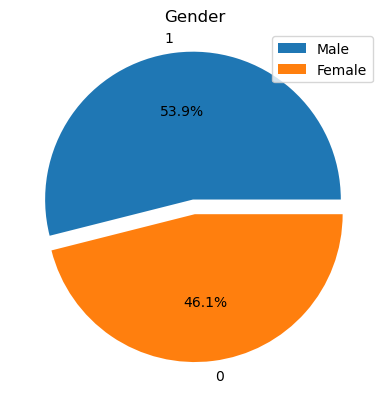

In [93]:
labels = ["1","0"]
palette_color = sns.color_palette('bright') 
explode = (0.1,0)

plt.title("Gender")
plt.pie(sm["sex"].value_counts(), explode=explode, labels = labels,autopct='%1.1f%%') 
plt.legend(['Male','Female'],loc=1)

plt.show() 